# Home Works

## 1st Checkpoint


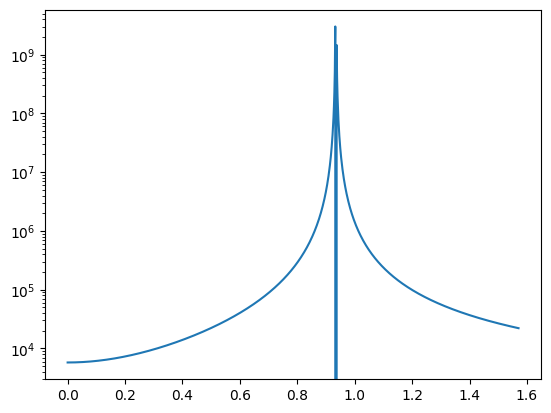

In [20]:
import numpy as np
from numpy import sin, cos, pi, array, sqrt
import matplotlib.pyplot as plt

x = np.linspace(0,pi/2,1000)

T_s = np.array([1e1,1e4,1e5,1e8])

# function
class F:
    
    def __init__(c):
        c.up = .99
        c.n = 1.7
        c.uk = 1/c.n
        c.sigm = 1e-4
        c.eps = 1/sqrt(1-c.up**2)
        c.omg = 1e-5
        c.teta_k = np.acos(1/c.n/c.up)
        c.teta_R = np.linspace(100/180*pi,170/180*pi,500)
        c.fi_R = 20  *pi/180
        c.fi_k = 0  *pi/180
        c.Mod_R = 1

        c.vec_up = array([0,0,c.up])
        c.vec_uk = F.vec_R(c.uk, c.teta_k, c.fi_k)

    def Tcos(c, ang): 
        return c.up**2 + c.uk**2 - 2*c.up*c.uk*cos(ang)

    def Tsin(c, ang):
        return c.up**2*c.uk**2*sin(ang)**2

    def t_d(c, ang):
        num = 2/c.sigm**2 * c.Tcos(ang)  # Исправлено: добавлен self
        dow = (1/c.n**2/c.omg - 1/c.eps)*c.Tcos(ang) + (1/c.eps - 1/c.omg)*c.Tsin(ang)
        return num/dow 

    def vec_R(mod, teta, fi): 
        return mod * array([sin(teta)*cos(fi),
                            sin(teta)*sin(fi),
                            cos(teta)])

    def sigma_p(c, t_s, ang): 
        return sqrt((1 + (t_s/c.t_d(ang=ang))**2)/c.sigm**2)

    def p_k(c):  
        return c.vec_up - c.vec_uk

    def Mod_vec(x):
        return np.linalg.norm(x)

    def t_til_d(c): 
        return 2/c.sigm**2 * c.omg*c.n**2 / (1-c.n**2*c.omg/c.eps)  # Исправлено: использование атрибутов

    def tau_d2(c, ang):
        ttild = c.t_til_d()
        tau2 = 2/c.sigm**2 * c.t_d(ang)*ttild / (1/c.eps - 1/c.omg) / (c.t_d(ang) + ttild)
        return tau2

    def R_eff(c, t_s, grd, ang=None):
        if ang is None: ang = c.teta_k
            
        R = F.vec_R(c.Mod_R, grd, c.fi_R)
        first = F.Mod_vec(np.cross(R,c.p_k()))**2
        second = np.dot(R,(np.cross(c.vec_up,c.vec_uk)))**2

        num = c.sigma_p(t_s, ang) * F.Mod_vec(c.p_k())
        dow = first + second/c.tau_d2(ang)/(1/t_s**2 + 1/c.t_til_d()**2) 
        return num / sqrt(dow)

    def sigma_t(c, t_s, teta=None):
        if teta is None:
            teta = c.teta_k
        return sqrt(c.sigma_p(t_s, ang=teta)**2/2 * c.Tcos(ang=teta)/c.Tsin(ang=teta))
Fn = F()

class vis:
    def R_eff():
        plt.figure(figsize=(9,6))
        for t_s in T_s:
            Y = [Fn.R_eff(t_s, grd=fi) for fi in Fn.teta_R]
            A = np.log10(t_s)//1
            plt.plot(Fn.teta_R/pi*180, Y, label=f"{t_s/10**A:.0f}e{int(A)}")

        mah_ang = (pi - np.asin(sin(Fn.teta_k)/Fn.n/(F.Mod_vec(Fn.p_k()))))*180/pi
        print(f"Mah_ang = {mah_ang:.2f} grades")
        print(f"Theta_k = {Fn.teta_k*180/pi:.2f} grades")
        plt.axvline(x=mah_ang, c="k", lw=1,label="mah_ang")  # Исправлено: c вместо self
        plt.minorticks_on()

# Все насечки внутрь + на всех сторонах
        plt.tick_params(axis='both', which='both', 
                direction='in',      # внутрь графика
                top=True,           # сверху
                right=True)         # справа
        plt.ylim([0,1e6])
        #plt.yscale("log")
        plt.legend()
        plt.show()

    def sigma_t():
        for t_s in T_s:
            Y = [Fn.sigma_t(t_s, teta=fi) for fi in x]
            A = np.log10(t_s)//1
            plt.plot(x/pi*180, Y, label=f"{t_s/10**A:.0f}e{int(A)}")  # Исправлено: int(A)
        plt.grid()
        plt.yscale("log")
        plt.legend()
        plt.show()

    def t_d():
        plt.plot(x, [Fn.t_d(ang=X) for X in x])
        plt.yscale("log")
        plt.show()

#vis.sigma_t()
#vis.R_eff()
vis.t_d()

## 2nd

C:\Users\Тата\AppData\Local\Temp\ipykernel_20708\1508004688.py:134: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x/pi*180, [Fn.t_d(X, d) for X in x],label = f"D = 1e{np.log10(d):.0f}")


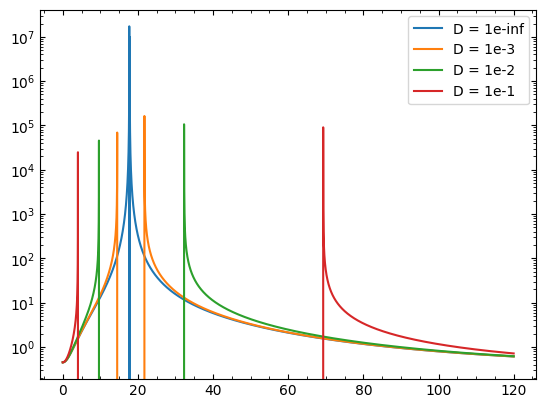

In [9]:
import numpy as np
from numpy import sin, cos, pi, array, sqrt
import matplotlib.pyplot as plt

x = np.linspace(0,120 *pi/180,50000)

T_s = np.array([1e1,1e4,1e5,1e8])
D  = np.array([0,1e-3,1e-2,1e-1])
# function
class F:
    
    def __init__(c):
        c.up = .7
        c.n = 1.5
        c.uk = 1/c.n
        c.sigm = 1e-5
        c.eps = 1/sqrt(1-c.up**2)
        c.omg = 1e-6
        c.teta_k = np.acos(1/c.n/c.up)
        c.teta_R = np.linspace(100/180*pi,170/180*pi,500)
        c.fi_R = 20  *pi/180
        c.fi_k = 0  *pi/180
        c.Mod_R = 1
        c.D = 0e-3


        c.vec_up = array([0,0,c.up])
        c.vec_uk = F.vec_R(c.uk, c.teta_k, c.fi_k)

    def N(c, N):
        if N == 0:
            return c.n
        elif N == 1:
            return c.D*c.N(0)/c.omg
        elif N == 2:    
            return 0 

    def Tcos(c, ang): 
        return c.up**2 + c.uk**2 - 2*c.up*c.uk*cos(ang)

    def Tsin(c, ang):
        return c.up**2*c.uk**2*sin(ang)**2

    def ksi(c):
        return c.N(0)*c.omg**2*c.N(2) + (c.N(1)*c.omg)**2 + \
             + c.N(0)**2 + 4*c.N(0)*c.N(1)*c.omg
    
    def ksi_1(c,D):
        return c.N(0)**2 * (1 + 4*D + D**2) 

    def t_d(c, ang, D):
        vec_uk = F.vec_R(c.uk, ang, c.fi_k)
        C1 = (F.Mod_vec(vec_uk)/c.omg/c.N(0) - 1/c.eps)
        C2 = (1/c.eps - c.ksi_1(D)*F.Mod_vec(vec_uk)/c.omg/c.N(0))
        C3 = c.Tsin(ang)/c.Tcos(ang)
        return 2/c.sigm/(C1+C2*C3)  

    def vec_R(mod, teta, fi): 
        return mod * array([sin(teta)*cos(fi),
                            sin(teta)*sin(fi),
                            cos(teta)])

    def sigma_p(c, t_s, ang): 
        return sqrt((1 + (t_s/c.t_d(ang=ang))**2)/c.sigm**2)

    def p_k(c):  
        return c.vec_up - c.vec_uk

    def Mod_vec(x):
        return np.linalg.norm(x)

    def t_til_d(c): 
        return 2/c.sigm**2 * c.omg*c.N(0)**2 / (1-c.N(0)**2*c.omg/c.eps)

    def tau_d2(c, ang):
        ttild = c.t_til_d()
        tau2 = 2/c.sigm**2 * c.t_d(ang)*ttild / (1/c.eps - 1/c.omg) / (c.t_d(ang) + ttild)
        return tau2

    def R_eff(c, t_s, grd, ang=None):
        if ang is None: ang = c.teta_k
            
        R = F.vec_R(c.Mod_R, grd, c.fi_R)
        C1 = F.Mod_vec(np.cross(R,c.p_k()))**2
        C2 = np.dot(R,(np.cross(c.vec_up,c.vec_uk)))**2

        num = c.sigma_p(t_s, ang) * F.Mod_vec(c.p_k())
        dow = C1 + C2/c.tau_d2(ang)/(1/t_s**2 + 1/c.t_til_d()**2) 
        return num / sqrt(dow)

    def sigma_t(c, t_s, teta=None):
        if teta is None:
            teta = c.teta_k
        return sqrt(c.sigma_p(t_s, ang=teta)**2/2 * c.Tcos(ang=teta)/c.Tsin(ang=teta))
Fn = F()

class vis:
    def R_eff():
        plt.figure(figsize=(9,6))
        for t_s in T_s:
            Y = [Fn.R_eff(t_s, grd=fi) for fi in Fn.teta_R]
            A = np.log10(t_s)//1
            plt.plot(Fn.teta_R/pi*180, Y, label=f"{t_s/10**A:.0f}e{int(A)}")

        mah_ang = (pi - np.asin(sin(Fn.teta_k)/Fn.n/(F.Mod_vec(Fn.p_k()))))*180/pi
        print(f"Mah_ang = {mah_ang:.2f} grades")
        print(f"Theta_k = {Fn.teta_k*180/pi:.2f} grades")
        plt.axvline(x=mah_ang, c="k", lw=1,label="mah_ang")  # Исправлено: c вместо self
        plt.minorticks_on()

# Все насечки внутрь + на всех сторонах
        plt.tick_params(axis='both', which='both', 
                direction='in',      # внутрь графика
                top=True,           # сверху
                right=True)         # справа
        plt.ylim([0,1e6])
        #plt.yscale("log")
        plt.legend()
        plt.show()

    def sigma_t():
        for t_s in T_s:
            Y = [Fn.sigma_t(t_s, teta=fi) for fi in x]
            A = np.log10(t_s)//1
            plt.plot(x/pi*180, Y, label=f"{t_s/10**A:.0f}e{int(A)}")  # Исправлено: int(A)
        plt.grid()
        plt.yscale("log")
        plt.legend()
        plt.show()

    def t_d():
        for d in D:
            #plt.scatter(x/pi*180, [Fn.t_d(X, d) for X in x],s=1)
            plt.plot(x/pi*180, [Fn.t_d(X, d) for X in x],label = f"D = 1e{np.log10(d):.0f}")
        plt.yscale("log")
        plt.legend()
        plt.minorticks_on()
        plt.tick_params(axis='both', which='both', 
                direction='in',      # внутрь графика
                top=True,           # сверху
                right=True) 
        plt.show()

#vis.sigma_t()
#vis.R_eff()
vis.t_d()